In [239]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X_train= pd.read_csv('./X_train_all_feature.csv',index_col=0)
y_train= pd.read_csv('./y_train_all_feature.csv')
X_test= pd.read_csv('./X_test_all_feature.csv', index_col=0)
y_test= pd.read_csv('./y_test_all_feature.csv')
X_test.fillna(0,inplace=True)

In [240]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
steps = [('Rescale', MinMaxScaler()),
         ('rfc', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='sqrt',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



# Feaure selection

In [241]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

roc_auc_score for the test dataset: 0.904
roc_auc_score for the test dataset: 0.899
roc_auc_score for the test dataset: 0.855
roc_auc_score for the test dataset: 0.918
roc_auc_score for the test dataset: 0.920


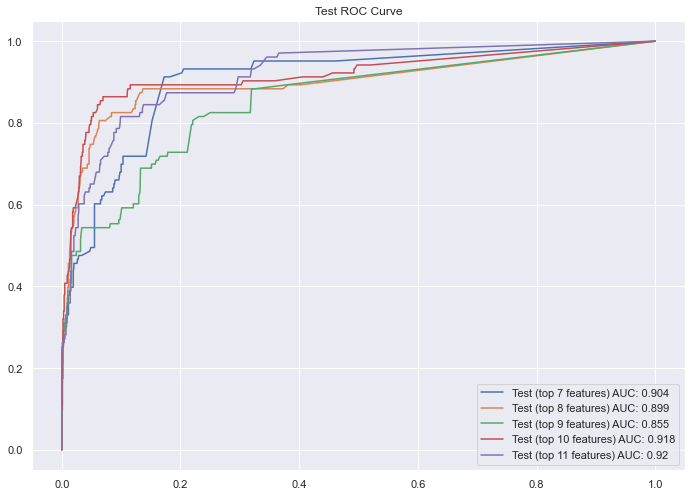

In [242]:
for i in range(7,12,1):
    top_importances=df_importances[0][:i]
    X_train_temp=pd.DataFrame(X_train,columns=top_importances)
    X_test_temp=pd.DataFrame(X_test,columns=top_importances)
    
    steps = [('Rescale', MinMaxScaler()),
             ('rfc', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='sqrt',max_depth=50))]
    model = Pipeline(steps)
    model = model.fit(X_train_temp,y_train)
    y_train_pred = model.predict(X_train_temp)
    y_test_pred = model.predict(X_test_temp)
    
    from Metric_Curves import multi_curves 
    mp=multi_curves(X_train_temp,y_train,X_test_temp,y_test,model)
    mp.plot_ROC_test(i)
    
    

Test PR-AUC is 0.628
Test PR-AUC is 0.707
Test PR-AUC is 0.586
Test PR-AUC is 0.741
Test PR-AUC is 0.677


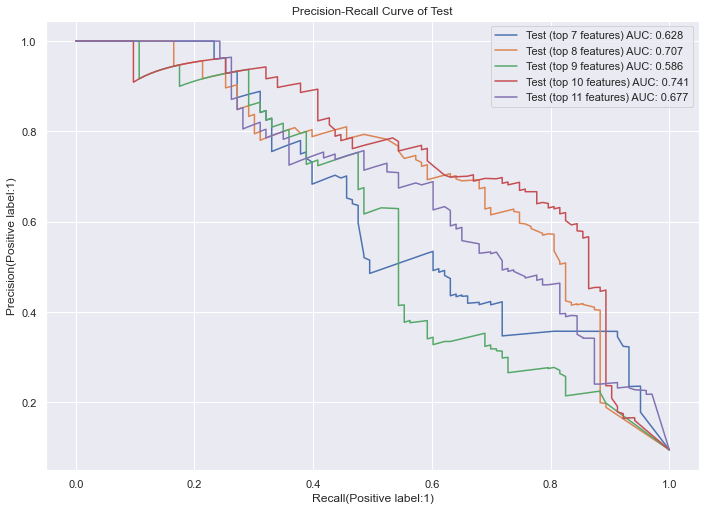

In [243]:
for i in range(7,12,1):
    top_importances=df_importances[0][:i]
    X_train_temp=pd.DataFrame(X_train,columns=top_importances)
    X_test_temp=pd.DataFrame(X_test,columns=top_importances)
    
    steps = [('Rescale', MinMaxScaler()),
             ('rfc', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='sqrt',max_depth=50))]
    model = Pipeline(steps)
    model = model.fit(X_train_temp,y_train)
    y_train_pred = model.predict(X_train_temp)
    y_test_pred = model.predict(X_test_temp)

    from Metric_Curves import multi_curves 
    mp=multi_curves(X_train_temp,y_train,X_test_temp,y_test,model)
    mp.plot_PR_test(i)
    

In [ ]:
# Top n features, n=10

In [244]:
df_importances[0][:10]

0                 TotalTeDiagCode
1     TotalInscClaimAmtReimbursed
2          MaxProcCodeNumPerClaim
3                 MaxHospitalDays
4                 TotalTeProcCode
5             totalDiagCode_25000
6    OPAnnualReimbursementAmt_sum
7               totalDiagCode_496
8             totalDiagCode_41400
9              totalDiagCode_4019
Name: 0, dtype: object

In [224]:
df_importances[0][:10].tolist()

['TotalTeDiagCode',
 'TotalInscClaimAmtReimbursed',
 'MaxProcCodeNumPerClaim',
 'MaxHospitalDays',
 'TotalTeProcCode',
 'totalDiagCode_25000',
 'OPAnnualReimbursementAmt_sum',
 'totalDiagCode_496',
 'totalDiagCode_41400',
 'totalDiagCode_4019']

In [245]:
n=10
X_train= pd.read_csv('./X_train_all_feature.csv',index_col=0)
X_test= pd.read_csv('./X_test_all_feature.csv', index_col=0)
X_train=pd.DataFrame(X_train,columns=df_importances[0][:n])
X_test=pd.DataFrame(X_test,columns=df_importances[0][:n])
X_test.fillna(0,inplace=True)

# Check PR_auc

In [246]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
steps = [('Rescale', MinMaxScaler()),
         ('rfc', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='sqrt',max_depth=50))]
model_reduct = Pipeline(steps)
model_reduct = model_reduct.fit(X_train,y_train)
y_train_pred = model_reduct.predict(X_train)
y_test_pred = model_reduct.predict(X_test)


Test PR-AUC is 0.741


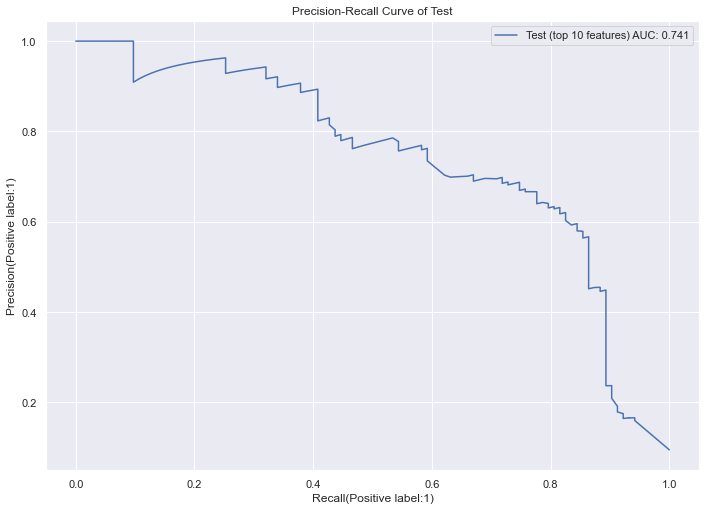

In [247]:
mp=multi_curves(X_train,y_train,X_test,y_test,model_reduct)
mp.plot_PR_test(10)
    

In [248]:
print('original test Fraud percentage: ',np.count_nonzero(y_test==1)/y_test.size)
print('predict test Fraud percentage:  ',np.count_nonzero(y_test_pred ==1)/y_test.size)

original test Fraud percentage:  0.09519408502772643
predict test Fraud percentage:   0.04990757855822551


In [249]:
from MetricPipeline import Metric_pipeline    
mp=Metric_pipeline(X_train,y_train,X_test,y_test,model_reduct)
mp.metrics()

,0,1
0,roc_auc_score(train),0.991
1,roc_auc_score(test),0.918
2,PR-AUC(train),0.922
3,PR-AUC(test),0.741
4,average_precision(train),0.922
5,average_precision(test),0.740
6,precision_score(train),0.966
7,precision_score(test),0.930


# Threshold 

In [250]:
threshold = 0.37

y_test_proba = model_reduct.predict_proba(X_test)
y_test_pred_8 = (y_test_proba[:,1] >= threshold).astype('int')



In [251]:
print('precision_score: ',precision_score(y_test, y_test_pred_8, average='weighted'))

print('recall_score:    ',recall_score(y_test, y_test_pred_8, average='weighted'))

precision_score:  0.9432052784864308
recall_score:     0.9426987060998152


In [252]:
print('original test Fraud percentage: ',np.count_nonzero(y_test==1)/y_test.size)
print('predict test Fraud percentage:       ',np.count_nonzero(y_test_pred ==1)/y_test.size)
print('threshold=0.37 test Fraud percentage: ',np.count_nonzero(y_test_pred_8==1)/y_test_pred_8.size)

original test Fraud percentage:  0.09519408502772643
predict test Fraud percentage:        0.04990757855822551
threshold=0.37 test Fraud percentage:  0.09704251386321626


In [253]:
y_train_proba = model_reduct.predict_proba(X_train)
y_test_proba = model_reduct.predict_proba(X_test)

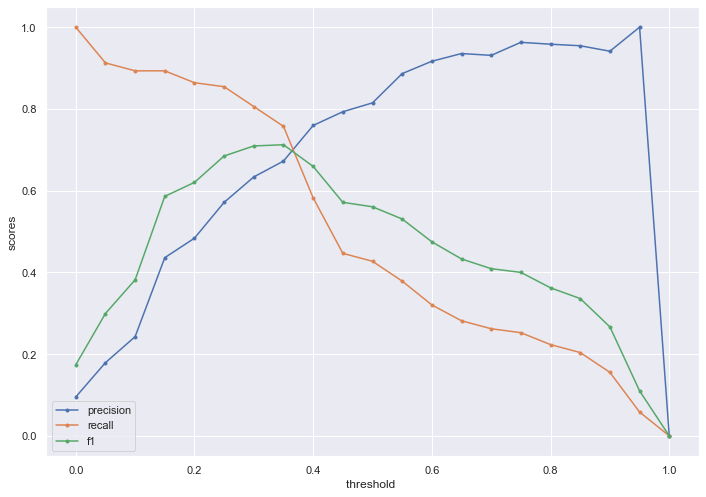

In [254]:
from sklearn.metrics import f1_score,recall_score,precision_score

p_score=[]
r_score=[]
f_score=[]
for i in np.linspace(0,1.0,21):
    y_test_pred =  ( y_test_proba [:, 1]>=i).astype(int)
    p=precision_score(y_test, y_test_pred)
    r=recall_score(y_test, y_test_pred)
    f=f1_score(y_test, y_test_pred)
    p_score.append(p)
    r_score.append(r)
    f_score.append(f)
    
        
    
plt.plot(np.linspace(0,1.0,21),p_score ,label='precision',marker='.')
plt.plot(np.linspace(0,1.0,21),r_score ,label='recall',marker='.')
plt.plot(np.linspace(0,1.0,21),f_score ,label='f1',marker='.')
ax = plt.gca()

plt.xlabel("threshold ")
plt.ylabel("scores")
plt.legend()


# Hyperparameter tuning

In [214]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(model_reduct.get_params())

Parameters currently in use:

{'memory': None, 'steps': [('rfc', RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_split=50, n_estimators=10,
                       oob_score=True, random_state=0))], 'verbose': False, 'rfc': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, min_samples_split=50, n_estimators=10,
                       oob_score=True, random_state=0), 'rfc__bootstrap': True, 'rfc__ccp_alpha': 0.0, 'rfc__class_weight': 'balanced', 'rfc__criterion': 'entropy', 'rfc__max_depth': 50, 'rfc__max_features': 'sqrt', 'rfc__max_leaf_nodes': None, 'rfc__max_samples': None, 'rfc__min_impurity_decrease': 0.0, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 50, 'rfc__min_weight_fraction_leaf': 0.0, 'rfc__n_estimators': 10, 'rfc__n_jobs': None, 'rfc__oob_score': True, 'rfc__random_state': 0, 'rfc__verbose': 0, 'rfc__warm_start': False}


In [210]:
#select top n feature importance

feat_labels = X_train.columns
importances = model.steps[0][1].feature_importances_
indices = np.argsort(importances)[::-1]
res=[]
for f in range(X_train.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    res.append([feat_labels[indices[f]], importances[indices[f]]])
df_importances=pd.DataFrame(res)
threshold_feature = 0.37
list(df_importances[df_importances[1]>threshold_feature ][0])# feature importance > threshold 

AttributeError: 'CalibratedClassifierCV' object has no attribute 'feature_importances_'

In [168]:
import numpy as np
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import PrecisionRecallDisplay

y_test_score = model.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_test_score)

display = PrecisionRecallDisplay(precision, recall, thresholds, plot_f1=True)
display.plot()

ValueError: X has 10 features, but RandomForestClassifier is expecting 5 features as input.

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

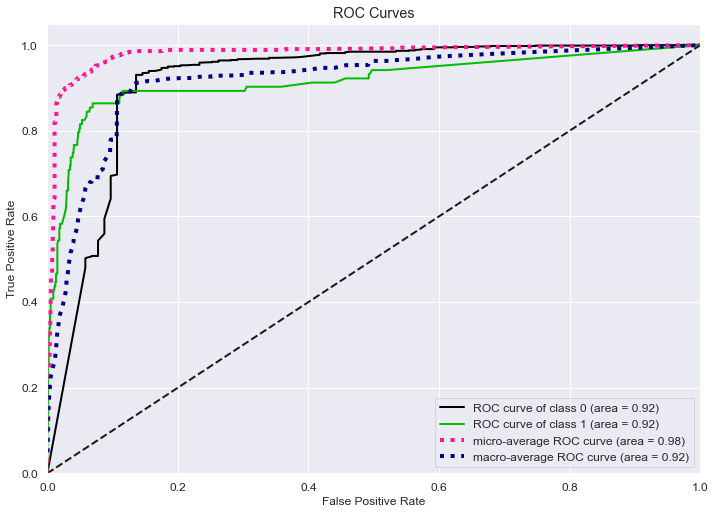

In [169]:
#pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, y_test_proba)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

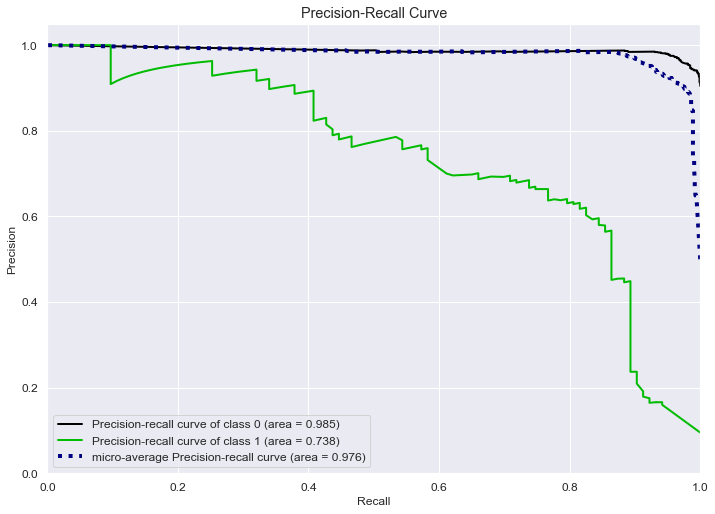

In [170]:
skplt.metrics.plot_precision_recall_curve(y_test, y_test_proba)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

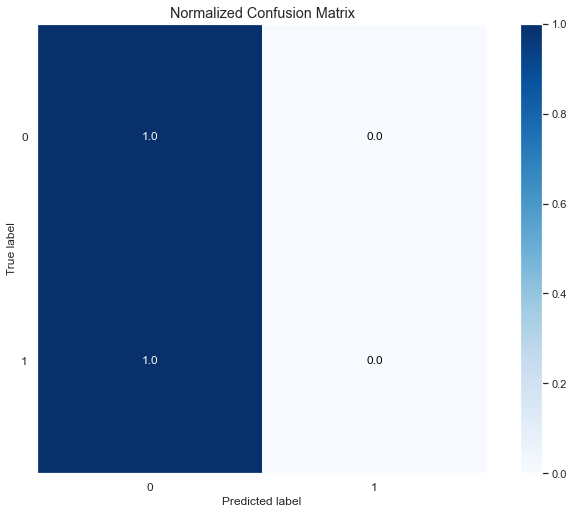

In [171]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

In [17]:
from sklearn.metrics import accuracy_score
threshold = 0.8

y_test_proba = model.predict_proba(X_test)
y_test_8 = (y_test_proba [:,1] >= threshold).astype('int')



In [174]:
y_test_pred_8

array([1, 0, 0, ..., 0, 0, 0])

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_8))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       979
           1       0.69      0.70      0.70       103

    accuracy                           0.94      1082
   macro avg       0.83      0.83      0.83      1082
weighted avg       0.94      0.94      0.94      1082



In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_8))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       979
           1       0.69      0.70      0.70       103

    accuracy                           0.94      1082
   macro avg       0.83      0.83      0.83      1082
weighted avg       0.94      0.94      0.94      1082



In [25]:
from sklearn.metrics import precision_score,recall_score

In [177]:
precision_score(y_test, y_test_pred_8, average='weighted')

0.9420295702090379

In [178]:
precision_score(y_test, y_test_pred_8, average='macro')

0.8303051753972

In [179]:
recall_score(y_test, y_test_pred_8, average='weighted')

0.9417744916820703

In [29]:
y_test_pred

array([1, 0, 1, ..., 0, 0, 0])

In [181]:
print('original test Fraud percentage: ',np.count_nonzero(y_test==1)/y_test.size)
print('predict test Fraud percentage:       ',np.count_nonzero(y_test_pred ==1)/y_test.size)
print('threshold=0.8 test Fraud percentage: ',np.count_nonzero(y_test_pred_8 ==1)/y_test_pred_8.size)

original test Fraud percentage:  0.09519408502772643
predict test Fraud percentage:        0.0
threshold=0.8 test Fraud percentage:  0.09611829944547134


In [183]:
y_test_pred_8.size

1082

In [184]:
from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_proba [:,1], n_bins=10)

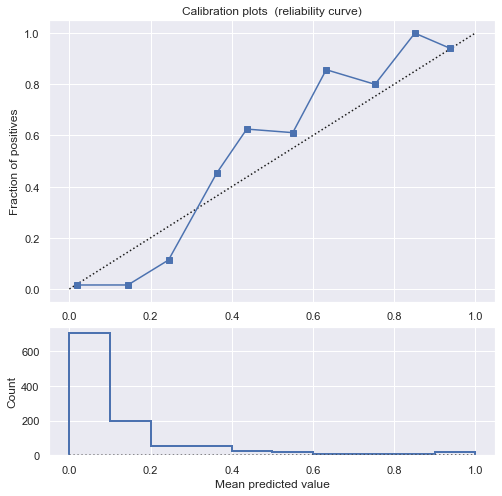

In [185]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s" % ('random forest', ))
ax2.hist(y_test_proba [:,1], range=(0, 1), bins=10, label='random forest',
             histtype="step", lw=2)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.set_ylabel("Fraction of positives")
ax1.set_title('Calibration plots  (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax.legend()
plt.show()

In [187]:
from sklearn.calibration import CalibratedClassifierCV
rfc=CalibratedClassifierCV(model[0][1], method='isotonic')

In [189]:
steps = [('rfc', rfc)]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred_rfc = model.predict(X_train)
y_test_pred_rfc = model.predict(X_test)





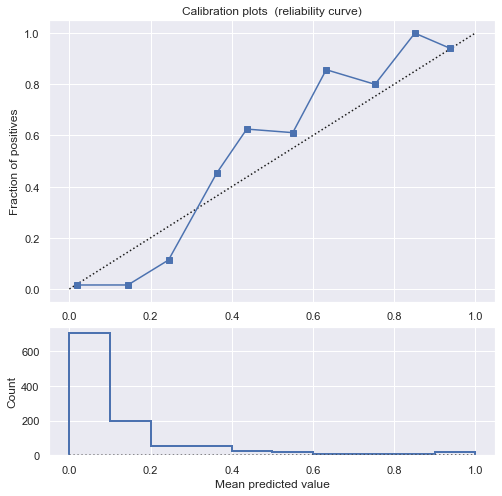

In [190]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s" % ('random forest', ))
ax2.hist(y_test_proba [:,1], range=(0, 1), bins=10, label='random forest',
             histtype="step", lw=2)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.set_ylabel("Fraction of positives")
ax1.set_title('Calibration plots  (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax.legend()
plt.show()

In [191]:
from sklearn.metrics import brier_score_loss
y_test_proba_rfc = rfc.predict_proba(X_test)
print('brier_score is : ', brier_score_loss(y_test, y_test_proba_rfc[:,1]))

brier_score is :  0.05598524543649229


In [192]:
fraction_of_positives_rfc, mean_predicted_value_rfc = calibration_curve(y_test, y_test_proba_rfc [:,1], n_bins=10)

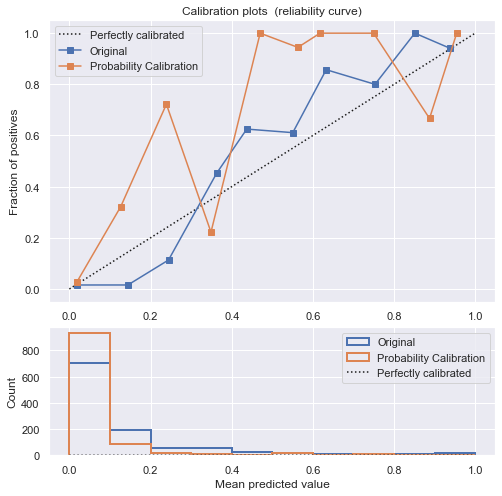

In [193]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s" % ('Original', ))
ax1.plot(mean_predicted_value_rfc, fraction_of_positives_rfc, "s-",label="%s" % ('Probability Calibration', ))
ax2.hist(y_test_proba [:,1], range=(0, 1), bins=10, label='Original',
             histtype="step", lw=2)
ax2.hist(y_test_proba_rfc [:,1], range=(0, 1), bins=10, label='Probability Calibration',
             histtype="step", lw=2)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.set_ylabel("Fraction of positives")
ax1.set_title('Calibration plots  (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax1.legend()
ax2.legend()
plt.show()

In [201]:
print('original test Fraud percentage: ',np.count_nonzero(y_test==1)/y_test.size)
print('predict test Fraud percentage:       ',np.count_nonzero(y_test_pred_8 ==1)/y_test.size)
print('threshold=0.8 test Fraud percentage: ',np.count_nonzero(y_test_proba_rfc_y ==1)/y_test_pred_8.size)

original test Fraud percentage:  0.09519408502772643
predict test Fraud percentage:        0.09611829944547134
threshold=0.8 test Fraud percentage:  0.038817005545286505


In [199]:
y_test_proba_rfc_y=y_test_8 = (y_test_proba_rfc [:,1] >= 0.37).astype('int')